In [6]:
import os
import glob
import re
import numpy as np
import matplotlib.pyplot as plt


def axesGiver(xAx: str, title: str):
    return plt.xlabel(xAx), plt.title(title)


def getValue(filename: str, yPara):
    """
    Inputs: filename, paramater to search for, if it'll be taking the CPU info for it instead of total
     (CPU paramater is to iterate over CPU information instead of total)
    Output: List of values that match yPara
    """
    yval = np.array([])
    #print(filename)
    with open(filename) as d:  # using 'with' keyword will auto-close the file at the end
        #print(d)
        #countevTime=0
        for s in d.readlines():  # for the string in whatever line is being read
            #if re.search(' loop', s) and ((countevTime % 2) == 0): #get event time data
            #    evTime = re.search(r"\d+\.\d+", s) #event time....
            #    countevTime = countevTime + 1
            #elif re.search(' loop', s) and not ((countevTime % 2) == 0):
            #    countevTime = countevTime + 1

            if re.search(yPara, s) and re.search(r"Avg request latency", s) and not re.search(r"request latency", yPara):
                matches = re.search(r'\((.*?)\)', s)
                value = matches.group(1)
                value = value.split("+")
                valist = list(value)
                #print(valist)
                for r in range(0, len(valist), 1):
                    if re.search(yPara, valist[r]):
                        value = re.search(r"\d+ ", valist[r])
                        yval = np.append(yval, values=float(value.group())/1000)
            elif re.search(yPara, s)  and re.search(":", s):
                value = s.split(":")
                #print(value)
                if value and re.search("us", value[1]):
                    value = re.search(r"\d+ ", value[1])
                    value = int(value.group())/1000
                    yval = np.append(yval, values=value)
                elif value: #and float(evTime.group()) <=W 200:
                    if re.search(r"\.", value[1]):
                        vsplit = value[1].split(".")
                        value = vsplit[0]
                        #value = re.search(r"\d+ ", value)        
                        yval = np.append(yval, values=float(value))
                    else:
                        value = re.search(r"\d+ ", value[1])        
                        yval = np.append(yval, values=float(value.group()))
        #print(yval)
        return yval

In [23]:
import matplotlib.lines as mlines

def autoGraphBSizeONE(foldername: str, y_param: str, linename):
    """
        Takes: A folder, the y paramater to look for, the name of the line, and optional param for dashed lines.
        Returns: matplotlib.plt with error bars of batch size on x and yparam on y.
    """

    y = np.array([])
    y_param = str(y_param + '*')
    valuedict = {}
    # getvalue only takes one file at a time
    y_values = getValue(foldername, y_param) 
    #print(y_values)
    y_mean = np.average(y_values)
    #y_err = np.std(y_values)/np.sqrt(len(y_values))
    y = np.append(y, y_mean)
    valuedict[linename] = y_values
    return valuedict


def plotReturn(y_param:str, xTitle, Title):
   """
   Input: A y paramater to search for
   Return: Plot with that parameter that takes in all data in properly named folders
   """

   filenamedict={
r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\ANPerfHamCli20GedServ.txt" : "Geddes GPU NVIDIA A100 (20 GB slice)",
r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\ANPerfHamCli10GedServ.txt" : "Geddes GPU NVIDIA A100 (10 GB slice)",
r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\PerfHamCli5GedServ.txt" : "Geddes GPU NVIDIA A100 (5 GB slice)",

r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\GPUPerfHamCliHamServDNode.txt" : "Hammer GPU NVIDIA Tesla T4 (16 GB)",



#r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\PerfHamCli40CPUGedServ.txt" : "Geddes CPU Server (40 CPUs)",

r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\PerfHamCliREPLICACPUGedServ.txt" : "Geddes CPU-only Server (20 CPUs, 64 GB)",
#r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\noCSV_perf\\PerfHamCliCPUGedServ.txt" : "Geddes CPU Server (20 CPUs)",

r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\ANODECPUHamCliHamServDNode.txt" :  "Hammer CPU-only Server (20 CPUs, 64 GB)" 
#r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\noCSV_perf\\CPUHamCliHamServSNode.txt" : "Hammer CPU Server (20 CPUs, Same Node)"

} 
   

   filenames = list(filenamedict.keys())
   boxnames = list(filenamedict.values())
   final = {}

   for j in range (0, len(boxnames), 1):
      final.update(autoGraphBSizeONE(filenames[j], y_param, boxnames[j]))



      #for k in range(1, len(boxnames), 1):
   box = plt.boxplot(final.values(), labels=final.keys(), vert=False)
   k = 0

   for b in zip(box['boxes']):
      if (re.search("HamServ", filenames[k])):
         b[0].set_color('blue')
      if (re.search("GedServ", filenames[k])):
         b[0].set_color('green')
      k = k + 1
   
   k = 0 
   wcount = 0
   for w in zip(box['whiskers']):
      if (re.search("HamServ", filenames[k])):
         w[0].set_color('blue')
      if (re.search("GedServ", filenames[k])):
         w[0].set_color('green')
      if wcount == 1:
         k = k+1
         wcount = 0
      else:
         wcount = 1

   k = 0
   wcount = 0
   for c in zip(box['caps']):
      if (re.search("HamServ", filenames[k])):
         c[0].set_color('blue')
      if (re.search("GedServ", filenames[k])):
         c[0].set_color('green')
      if(wcount == 1):
         k = k+1
         wcount = 0
      else:
         wcount = 1


   k = 0
   for m in zip(box['medians']):
      
      print("Box:", boxnames[k] , "Median Value: ", m[0].get_xdata())
      k = k+1


   ged = mlines.Line2D([], [], color='green', marker='_', ls='', label='Triton server at Geddes (k8s)')
   ham = mlines.Line2D([], [], color='blue', marker='_', ls='', label='Triton server at Hammer')
   plt.legend(handles=[ged, ham], loc='best')
   plt.xlim(0, None)
   axesGiver(xTitle, Title)
   return box

In [11]:

plotReturn("overhead", "Overhead (ms)", title)
plt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\overhead.png", bbox_inches='tight')
plt.clf()
"""
plotReturn(r"compute input", "Input Latency (ms)", "Performance Analyzer (DeepMET model)")
plt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\input.png", bbox_inches='tight')
plt.clf()

plotReturn(r"compute output", "Output Latency (ms)", "Performance Analyzer (DeepMET model)")
plt.xlim(None, 0.4)
plt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\output.png", bbox_inches='tight')
plt.clf()


plt.xscale("log")
plotReturn(r"compute infer", "Inference Latency (ms)", "Performance Analyzer (DeepMET model)")
plt.xlim(5, 1000)
plt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\infLat.png", bbox_inches='tight')
plt.show()
plt.clf()


plt.xscale("log")
plotReturn("queue", "Queue Latency (ms)", "Performance Analyzer (DeepMET model)")
plt.xlim(0.01, 1500)
plt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\queue.png", bbox_inches='tight')
plt.show()
plt.clf()"""


Box: Geddes GPU NVIDIA A100 (20 GB slice) (<matplotlib.lines.Line2D object at 0x00000298FF9FF310>,)
Box: Geddes GPU NVIDIA A100 (10 GB slice) (<matplotlib.lines.Line2D object at 0x00000298FFA7FD90>,)
Box: Geddes GPU NVIDIA A100 (5 GB slice) (<matplotlib.lines.Line2D object at 0x00000298FFA4B710>,)
Box: Hammer GPU NVIDIA Tesla T4 (16 GB) (<matplotlib.lines.Line2D object at 0x00000298FFAA3390>,)
Box: Geddes CPU-only Server (20 CPUs, 64 GB) (<matplotlib.lines.Line2D object at 0x00000298FFAB2A50>,)
Box: Hammer CPU-only Server (20 CPUs, 64 GB) (<matplotlib.lines.Line2D object at 0x00000298FFABE590>,)


'\nplotReturn(r"compute input", "Input Latency (ms)", "Performance Analyzer (DeepMET model)")\nplt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\input.png", bbox_inches=\'tight\')\nplt.clf()\n\nplotReturn(r"compute output", "Output Latency (ms)", "Performance Analyzer (DeepMET model)")\nplt.xlim(None, 0.4)\nplt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\output.png", bbox_inches=\'tight\')\nplt.clf()\n\n\nplt.xscale("log")\nplotReturn(r"compute infer", "Inference Latency (ms)", "Performance Analyzer (DeepMET model)")\nplt.xlim(5, 1000)\nplt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\infLat.png", bbox_inches=\'tight\')\nplt.show()\nplt.clf()\n\n\nplt.xscale("log")\nplotReturn("queue", "Queue Latency (ms)", "Performance Analyzer (DeepMET model)")\nplt.xlim(0.01, 1500)\nplt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\queue.p

<Figure size 640x480 with 0 Axes>

Box: Geddes GPU NVIDIA A100 (20 GB slice) Median Value:  [11.9125 11.9125]
Box: Geddes GPU NVIDIA A100 (10 GB slice) Median Value:  [18.753 18.753]
Box: Geddes GPU NVIDIA A100 (5 GB slice) Median Value:  [87.523 87.523]
Box: Hammer GPU NVIDIA Tesla T4 (16 GB) Median Value:  [70.895 70.895]
Box: Geddes CPU-only Server (20 CPUs, 64 GB) Median Value:  [966.158 966.158]
Box: Hammer CPU-only Server (20 CPUs, 64 GB) Median Value:  [1112.503 1112.503]


C:\Users\pursue\AppData\Local\Temp\ipykernel_20780\1706239132.py:105: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, None)


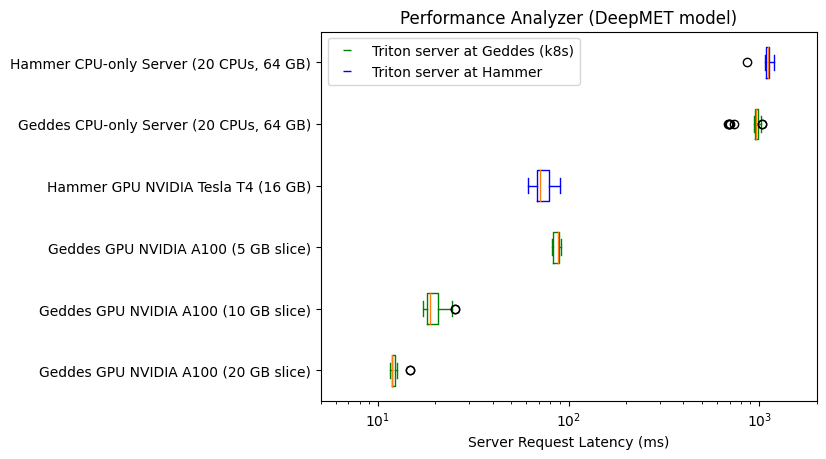

In [24]:
title = "Performance Analyzer (DeepMET model)"
plt.xscale("log")
plotReturn("request latency", "Server Request Latency (ms)", title)
plt.xlim(5, 2000)
#plt.xticks([10, 100, 1000])
plt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\LatencyFigsServlatency.png", bbox_inches='tight')
plt.show()

Box: Geddes GPU NVIDIA A100 (20 GB slice) Median Value:  [4054. 4054.]
Box: Geddes GPU NVIDIA A100 (10 GB slice) Median Value:  [3990. 3990.]
Box: Geddes GPU NVIDIA A100 (5 GB slice) Median Value:  [3084. 3084.]
Box: Hammer GPU NVIDIA Tesla T4 (16 GB) Median Value:  [3909.5 3909.5]
Box: Geddes CPU-only Server (20 CPUs, 64 GB) Median Value:  [321. 321.]
Box: Hammer CPU-only Server (20 CPUs, 64 GB) Median Value:  [335.5 335.5]


C:\Users\pursue\AppData\Local\Temp\ipykernel_20780\1706239132.py:105: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, None)


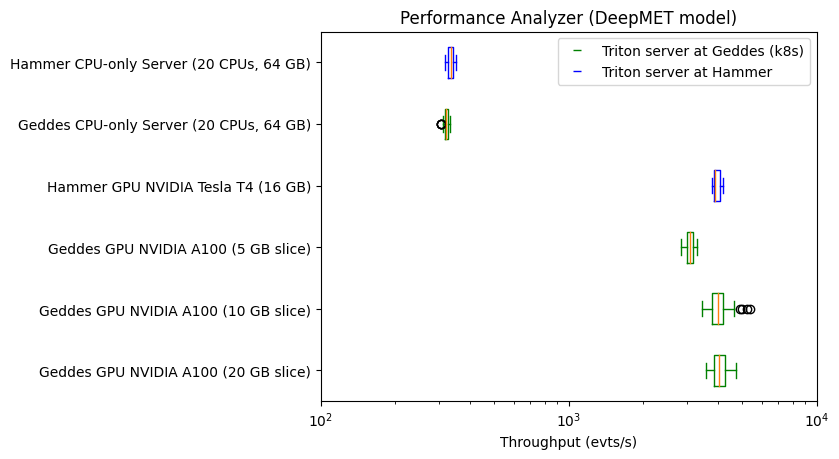

In [25]:
plt.xscale("log")
plotReturn("Throughput:", "Throughput (evts/s)", title)
plt.xlim(100, 10000)
#plt.xticks([200, 1000, 5000, 10000], ["$2^2$", "$1^3$", "$8^3$", "$1^4$"])
plt.savefig(r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\LatencyFigs\\Throughput.png", bbox_inches='tight')
plt.show()

In [110]:

def barReturn(xTitle, Title):

   filenamedict={
r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\ANPerfHamCli20GedServ.txt" : "Geddes GPU NVIDIA A100 (20 GB slice)",
r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\ANPerfHamCli10GedServ.txt" : "Geddes GPU NVIDIA A100 (10 GB slice)",
r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\PerfHamCli5GedServ.txt" : "Geddes GPU NVIDIA A100 (5 GB slice)",

r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\GPUPerfHamCliHamServDNode.txt" : "Hammer GPU NVIDIA Tesla T4 (16 GB)",

#r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\PerfHamCli40CPUGedServ.txt" : "Geddes CPU Server (40 CPUs)",

r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\PerfHamCliREPLICACPUGedServ.txt" : "Geddes CPU-only Server (20 CPUs, 64 GB)",
#r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\noCSV_perf\\PerfHamCliCPUGedServ.txt" : "Geddes CPU Server (20 CPUs)",

r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\\noCSV_perf\\ANODECPUHamCliHamServDNode.txt" :  "Hammer CPU-only Server (20 CPUs, 64 GB)" 
#r"c:\\Users\\pursue\\Documents\\jupityr\\nodegraphs\noCSV_perf\\CPUHamCliHamServSNode.txt" : "Hammer CPU Server (20 CPUs, Same Node)"

} 
   
   #fig, ax = plt.subplots()
   bottom = np.zeros(1)
   width = 0.5
   filenames = list(filenamedict.keys())
   boxnames = list(filenamedict.values())
  
   search = ["overhead", "compute input", "queue", "compute infer", "compute output"] 
   """
      for k in range (0, 5, 1):
         finald[k] = np.append(np.average(getValue(filenames[j], search[k])), list(finald.values())[k])
   """
   for j in range (1, len(filenames), 1):
      finald = {"Overhead" : np.average(getValue(filenames[j], "overhead")),
            "Input" :  np.average(getValue(filenames[j], "compute input")),
             "Queue" :  np.average(getValue(filenames[j], "queue")),
            "Inference" :  np.average(getValue(filenames[j], "compute infer")),
            "Output" :  np.average(getValue(filenames[j], "compute output"))
             }   
      #print(finald)
      a = 0
      for lab, values in finald.items():
         plt.bar(a, values, width, label=lab)
         a = a + 1
         bottom += values


   plt.legend()
   print(finald)
   axesGiver(xTitle, Title)
   return plt.show()

{'Overhead': 0.21334693877551017, 'Input': 2.3424489795918366, 'Queue': 1.936816326530612, 'Inference': 15.04087755102041, 'Output': 0.03885714285714286}
{'Overhead': 0.2122, 'Input': 2.6053, 'Queue': 55.826600000000006, 'Inference': 27.735400000000006, 'Output': 0.043899999999999995}
{'Overhead': 0.124875, 'Input': 3.5209500000000005, 'Queue': 48.330175000000004, 'Inference': 21.528750000000002, 'Output': 0.034499999999999996}
{'Overhead': 1.465175, 'Input': 17.462875000000004, 'Queue': 318.650875, 'Inference': 602.2605000000001, 'Output': 0.43145}
{'Overhead': 0.1405, 'Input': 10.393099999999999, 'Queue': 794.6469000000001, 'Inference': 287.5117000000001, 'Output': 0.0988}
{'Overhead': 0.1405, 'Input': 10.393099999999999, 'Queue': 794.6469000000001, 'Inference': 287.5117000000001, 'Output': 0.0988}


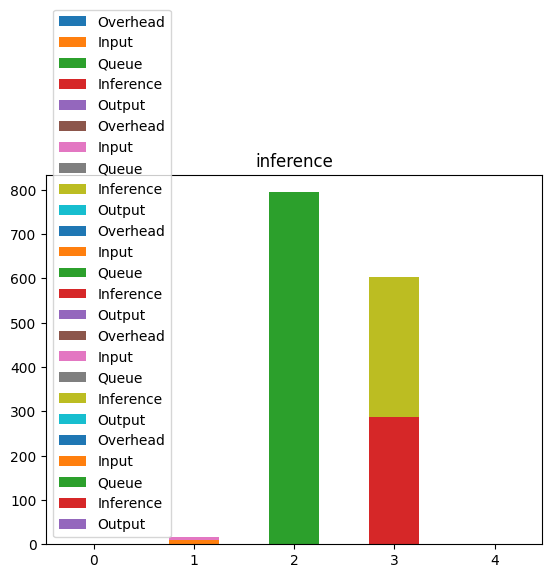

In [113]:
barReturn("", "inference")